# EXPLORATORY DATA ANALYSIS

In [965]:
# INSTALLED TO USE TextBlob 
!pip install textblob


In [966]:
#IMPORTS THAT ARE ESSENTIAL LIBRARIES
import pandas as pd # data manipulation
import seaborn as sns # visualisation
import matplotlib.pyplot as plt # visualisation
from wordcloud import WordCloud, STOPWORDS #
from collections import Counter # counts the frequency of the words
from textblob import TextBlob # polarity and subjectivity 
from sklearn.feature_extraction.text import CountVectorizer # generated n-grams
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)


In [967]:
# LOADING THE DATASET I DOWNLOADED FROM KAGGLE
reviews = pd.read_csv("Reviews Dataset.csv")

In [968]:
# CHECKING THE DATA TYPES AND COUNT OF NON-NULL ENTRIES IN EACH COLUMN IN THE DATASET
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Feedback         996 non-null    object 
 1   Sentiment Label  996 non-null    int64  
 2   Ratings          996 non-null    int64  
 3   Unnamed: 3       0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.3+ KB


In [969]:
# CHECKING TO SEE HOW MANY DIMENSIONS (ROWS AND COLUMNS) WE HAVE IN THE THE DATASET
reviews.shape

(996, 4)

In [970]:
# DISPLAYS THE TOTAL MISSING VALUES PER COLUMN 
print("Missing Values:")
print(reviews.isnull().sum())
print("\n")

Missing Values:
Feedback             0
Sentiment Label      0
Ratings              0
Unnamed: 3         996
dtype: int64




In [971]:
# DROPS THE UNNECESSARY OR EMPTY COLUMN TITLED Unnamed
reviews = reviews.drop(columns=['Unnamed: 3'])

In [972]:
# RECHECING THE STRUCTURE OF THE DATA AFTER THE DROP
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Feedback         996 non-null    object
 1   Sentiment Label  996 non-null    int64 
 2   Ratings          996 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.5+ KB


In [973]:
# GETTING A PREVIEW OF 10 RANDOM SAMPLES FROM THE DATASET
reviews.sample(10, random_state=42)


,Feedback,Sentiment Label,Ratings
832,No helping nature no support All lab staff are...,0,1
970,Overall Hospital well maintained hygienic clea...,1,4
96,Dr Mohan Keshavamurthy operated for kidney sto...,1,5
587,We had to wait an hour despite having an appoi...,1,3
450,Hi thank you for rating us 5 stars We're glad ...,1,5
266,Came to the Radiology department for my wifeâ€...,1,4
290,Worst Experience in Aster CMI hospital,0,2
158,Dr Ajay Rao is an excellent oncologist.We are ...,1,5
668,very professional and friendly towards patient...,1,5
572,Dr Saji M J have been consulting him from pas...,1,5


In [974]:
# SHOWS US THE FIRST 5 ROWS OF THE DATASET
reviews.head()

,Feedback,Sentiment Label,Ratings
0,Good and clean hospital. There is great team o...,1,5
1,Had a really bad experience during discharge. ...,1,5
2,I have visited to take my second dose and Proc...,1,4
3,That person was slightly clueless and offered...,1,3
4,There is great team of doctors and good OT fac...,0,1


In [975]:
# SHOWS US THE LAST 5 ROWS OF THE DATASET
reviews.tail()


,Feedback,Sentiment Label,Ratings
991,very careful about safety measures every one i...,1,4
992,I do not trust in their reports I got same tes...,0,2
993,They just want the patients to return to their...,0,1
994,I suggest you not to visit this hospital if yo...,0,2
995,NU hospital has provided us the excellent serv...,1,4


In [976]:
# CHECKS THE DATA FOR ANY DUPLICATE ROWS
print("DUPLICATES: ")
print(reviews.duplicated().sum())


DUPLICATES: 
19


In [977]:
# DROPS THE DUPLICATE ROWS 
reviews = reviews.drop_duplicates()


In [978]:
# CHECKING TO SEE HOW MANY DIMENSIONS WE HAVE IN THE THE DATASET AFTER DROPPING THE DUPLICATES 
reviews.shape

(977, 3)

In [979]:
# COUNTS UNIQUE WORDS ON THE DATASET
def vocab_size(text_series):
    words = ' '.join(text_series).split()  
    return len(set(words))  

 # THE SIZE IS DISPLAYED
print("\n Vocabulary Size BEFORE Cleaning:")
print("Vocabulary size:", vocab_size(reviews['Feedback']))



 Vocabulary Size BEFORE Cleaning:
Vocabulary size: 3456


In [980]:
# CLEANS THE TEXT DATA AND RETURNS THE FIRST 5 ROWS
def clean_text(text):
    text = text.lower()  # CONVERTS THE TEXT TO LOWERCASE
    text = re.sub(r'[^\w\s]', '', text)  # REMOVES PUCTUATION 
    text = re.sub(r'\d+', '', text)  # REMOVEES NUMBERS 
    text = re.sub(r'\s+', ' ', text).strip()  # REMOVES ANY EXTRA WHITESPACE  
    return text  

# APPLYING THE ABOVE TO THE FEEDBACK COLUMN
reviews['Cleaned_Feedback'] = reviews['Feedback'].apply(clean_text)

# DISPLAYS THE COMPARISON BETWEEN ORIGIONAL AND CLEANED
print("Original vs Cleaned Feedback:\n")
for original, cleaned in zip(reviews['Feedback'].head(), reviews['Cleaned_Feedback'].head()):
    print(f"Original: {original}")
    print(f"Cleaned : {cleaned}")
    print("-" * 50)

Original vs Cleaned Feedback:

Original: Good and clean hospital. There is great team of doctors and good OT facility. The medical facilities are all great with good in-patient post operative care by doctors, nurses. The housekeeping staff is also good but they can respond to calls from the room a little faster. 
Cleaned : good and clean hospital there is great team of doctors and good ot facility the medical facilities are all great with good inpatient post operative care by doctors nurses the housekeeping staff is also good but they can respond to calls from the room a little faster
--------------------------------------------------
Original: Had a really bad experience during discharge. They need to be sensitive and more transparent towards the patient and his/her family. 
Cleaned : had a really bad experience during discharge they need to be sensitive and more transparent towards the patient and hisher family
--------------------------------------------------
Original: I have visit

In [981]:
# COUNTS UNIQUE WORDS ON THE DATASET
def vocab_size(text_series):
    words = ' '.join(text_series).split()
    return len(set(words))
 
 # THE SIZE IS DISPLAYED
print("Vocabulary size:", vocab_size(reviews['Cleaned_Feedback']))

Vocabulary size: 2573


In [982]:
# DEFINES THE STOPWORD SET FOR FILTERING 
stop_words = set(STOPWORDS)

# COUNTS THE STOPWORDS AND MEANINGFUL WORDS 
def count_stopwords(text):
    words = text.split()
    return sum(1 for w in words if w in stop_words)

#  COUNTS HOW MANY NON STOPWORDS APPEAR IN A REVIEW
def count_meaningful_words(text):
    words = text.split()
    return sum(1 for w in words if w not in stop_words)

# APPLY THE FUNCTION ON THE CLEANED FEEDBACK 
reviews["stopword_count"] = reviews["Cleaned_Feedback"].apply(count_stopwords)
reviews["meaningful_word_count"] = reviews["Cleaned_Feedback"].apply(count_meaningful_words)

# DISPLAY THE FIRST 5 ROWS TO VALIDATE THE WORD COUNTS 
print(reviews[["Cleaned_Feedback", "stopword_count", "meaningful_word_count"]].head())

                                    Cleaned_Feedback  stopword_count  \
0  good and clean hospital there is great team of...              20   
1  had a really bad experience during discharge t...              10   
2  i have visited to take my second dose and proc...              13   
3  that person was slightly clueless and offered ...              15   
4  there is great team of doctors and good ot fac...               4   

   meaningful_word_count  
0                     27  
1                     11  
2                     19  
3                     15  
4                      6  


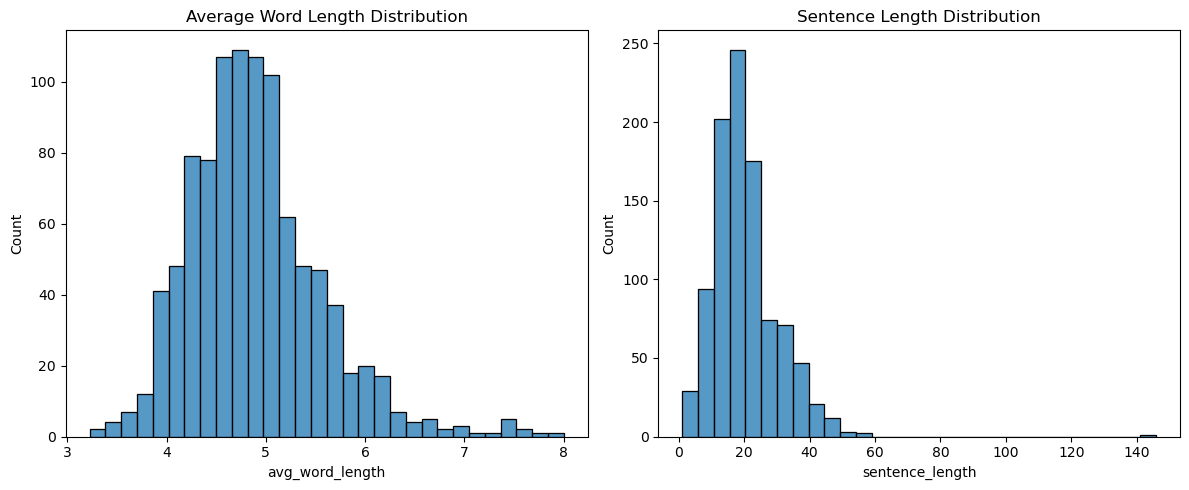

In [983]:
# CALCULATES THE AVERAGE WORD LENGTH AND THE SENTENCE LENGTH
reviews["avg_word_length"] = reviews["Cleaned_Feedback"].apply(lambda x: np.mean([len(w) for w in x.split()]) if x else 0)
reviews["sentence_length"] = reviews["Cleaned_Feedback"].apply(lambda x: len(x.split()) if x else 0)

# VISUALISING THE DISTRIBUTION OF THE AVERAGE WORD LENGTH AND THE SENTENCE LENGTH
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(reviews["avg_word_length"], bins=30)
plt.title("Average Word Length Distribution")

plt.subplot(1,2,2)
sns.histplot(reviews["sentence_length"], bins=30)
plt.title("Sentence Length Distribution")

plt.tight_layout()
plt.show()


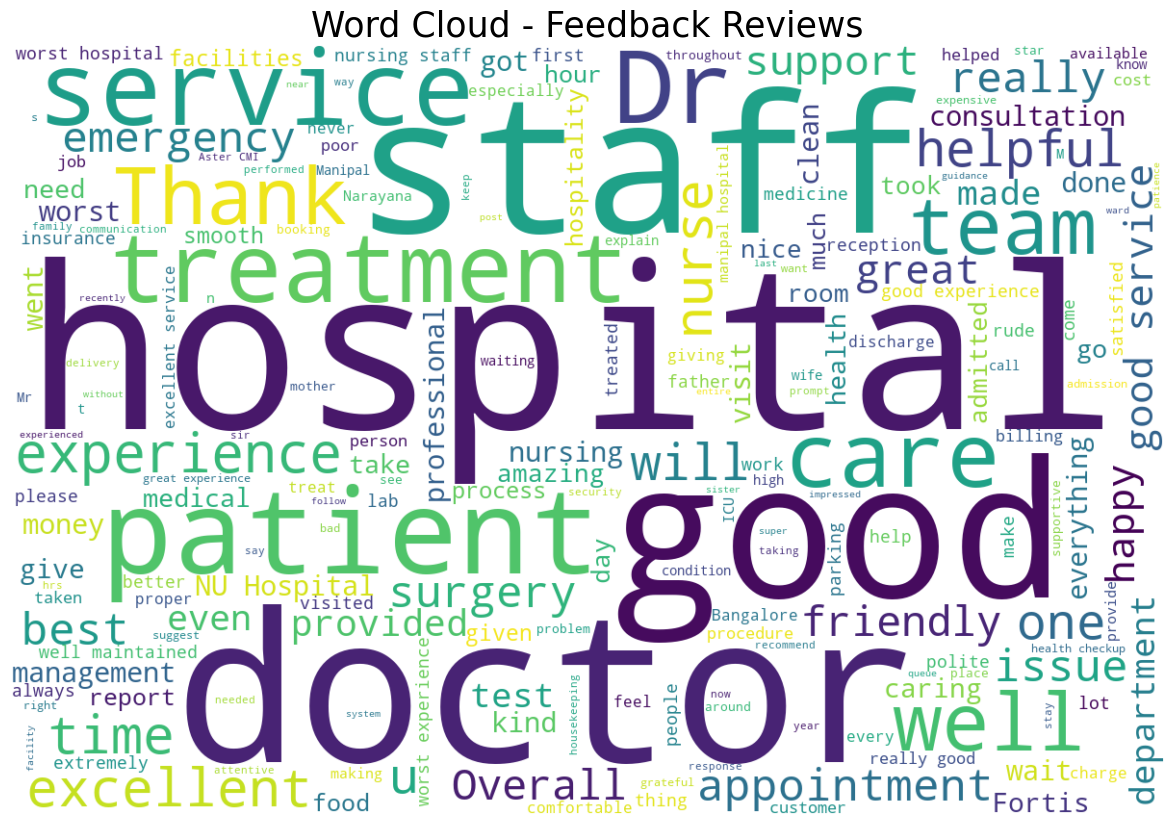

In [984]:
# USES THE DATAFRAME AND THE FEEDBACK COLUMN 
text = " ".join(review for review in reviews['Feedback'].dropna())

# DEFINING STOPWORDS TO IGNORE WORDS LIKE 'the', 'and', etc.
stopwords = set(STOPWORDS)

# CREATING A WORD CLOUD WITH THE ABOVE STYLE 
wordcloud = WordCloud(
    background_color='white',  
    stopwords=stopwords,
    width=1200,
    height=800
).generate(text)

# VISUALLY PRESENTING IT
plt.figure(figsize=(15, 10))
plt.title('Word Cloud - Feedback Reviews', fontsize=25)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

Top words in 5-star reviews:
[('good', 148), ('hospital', 125), ('staff', 70), ('doctors', 60), ('service', 60), ('well', 60), ('care', 55), ('experience', 51), ('treatment', 49), ('excellent', 42), ('doctor', 38), ('team', 35), ('really', 35), ('patient', 31), ('helpful', 30), ('services', 28), ('thanks', 28), ('thank', 27), ('nurses', 26), ('best', 26)]

Top words in 1-star reviews:
[('hospital', 52), ('worst', 29), ('doctor', 21), ('staff', 20), ('emergency', 20), ('patients', 19), ('patient', 18), ('will', 14), ('experience', 13), ('doctors', 10), ('good', 10), ('money', 10), ('dont', 10), ('give', 9), ('went', 9), ('time', 9), ('wait', 9), ('please', 9), ('service', 8), ('one', 8)]


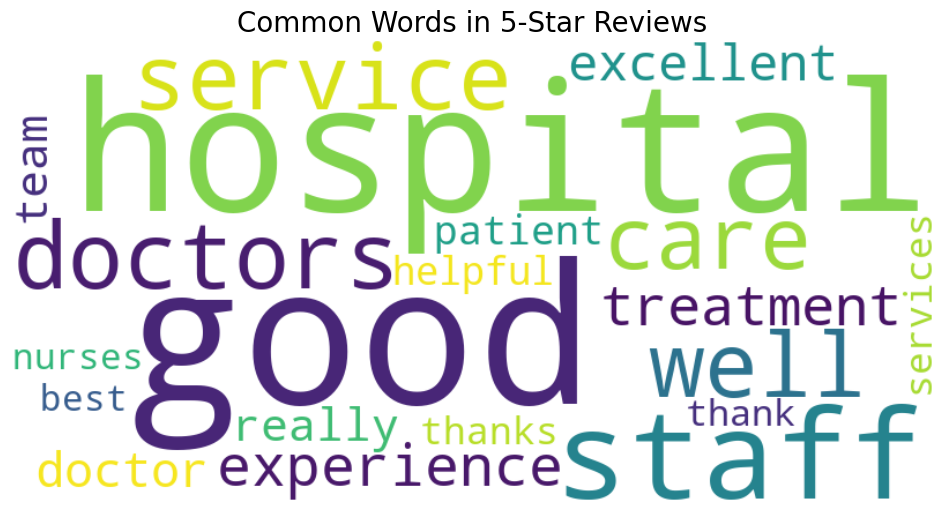

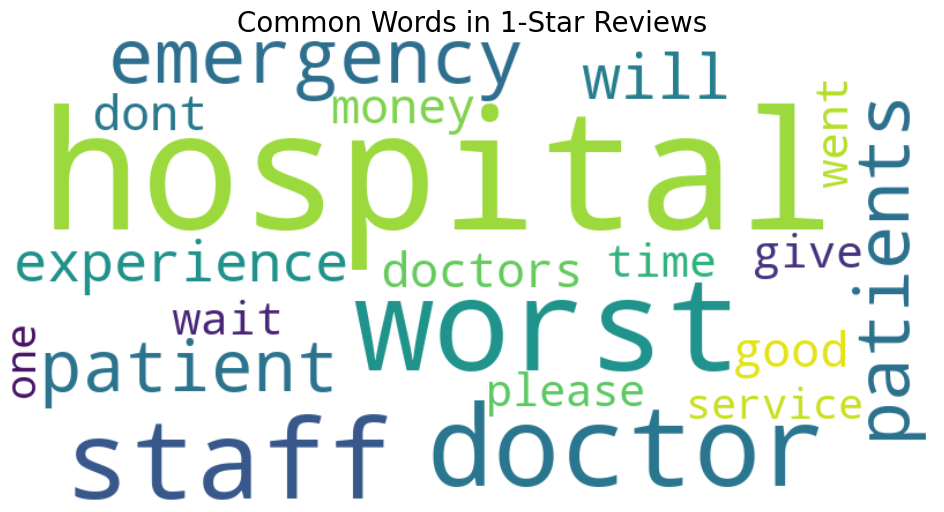

In [985]:
# GETTING THE TOP WORDS FROM THE REVIEWS
def get_top_words(text_series, stopwords=set(STOPWORDS), n=20):
    all_words = ' '.join(text_series).split()
    # REMOVING STOPWORDS
    filtered_words = [word for word in all_words if word not in stopwords and len(word) > 2]
    counter = Counter(filtered_words)
    return counter.most_common(n)

# SEPERATING THE REVIEWS BY RATING (1-star and 5-star)
reviews_5star = reviews[reviews['Ratings'] == 5]['Cleaned_Feedback']
reviews_1star = reviews[reviews['Ratings'] == 1]['Cleaned_Feedback']

# RETURN TOP WORDS FOR 5 STAR AND 1 STAR 
top_words_5star = get_top_words(reviews_5star)
top_words_1star = get_top_words(reviews_1star)

print("Top words in 5-star reviews:")
print(top_words_5star)

print("\nTop words in 1-star reviews:")
print(top_words_1star)

# VISUALISING IT WITH WORDCLOUDS FOR EACH OF THE RATINGS

def plot_wordcloud(words_freq, title):
    wordcloud = WordCloud(
        background_color='white',
        width=800,
        height=400
    ).generate_from_frequencies(dict(words_freq))
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

plot_wordcloud(top_words_5star, "Common Words in 5-Star Reviews")
plot_wordcloud(top_words_1star, "Common Words in 1-Star Reviews")

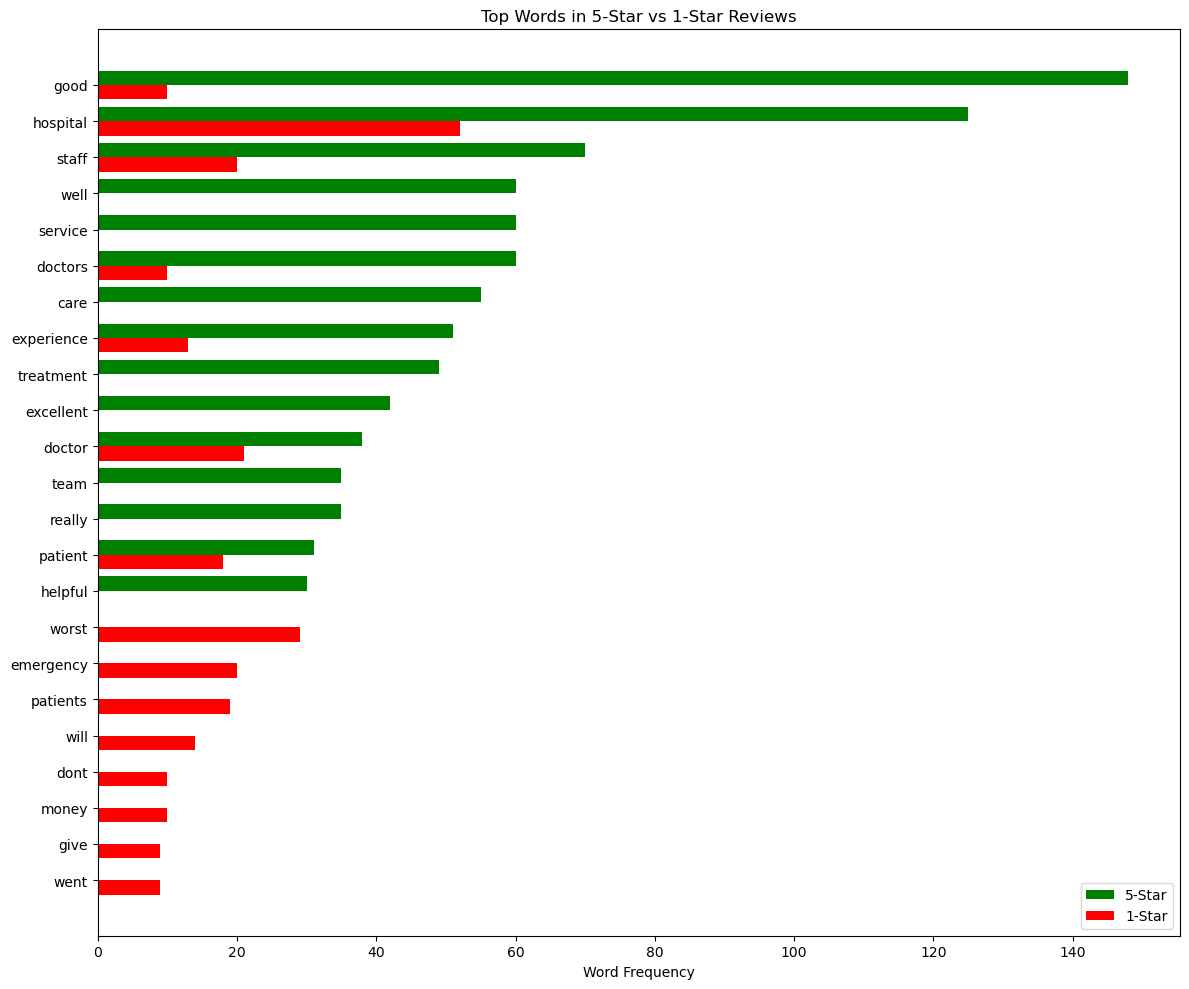

In [986]:
#  TEXT CLEANING 
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  
    text = re.sub(r'\d+', '', text)     
    text = re.sub(r'\s+', ' ', text).strip() 
    return text

# APPLY CLEANING
reviews['cleaned_feedback'] = reviews['Feedback'].apply(clean_text)

# GET WORD COUNT EXCLUDING STOPWORDS AND SHORT WORDS
def get_word_counts(text_series, stopwords=set(STOPWORDS)):
    all_words = ' '.join(text_series).split()
    filtered_words = [w for w in all_words if w not in stopwords and len(w) > 2]
    return Counter(filtered_words)

# GET WORD COUNT FOR 5-star AND 1-star REVIEWS
wc_5 = get_word_counts(reviews[reviews['Ratings'] == 5]['cleaned_feedback'])
wc_1 = get_word_counts(reviews[reviews['Ratings'] == 1]['cleaned_feedback'])

# SELECTING ONLY THE TOP 15 WORDS FROM EACH 
top_5 = wc_5.most_common(15)
top_1 = wc_1.most_common(15)

# CONVERTING TO DATAFRAME
df_5 = pd.DataFrame(top_5, columns=['word', 'count'])
df_1 = pd.DataFrame(top_1, columns=['word', 'count'])

# MERGE TO DO SIDE BY SIDE COMPARISON 
df_compare = pd.merge(df_5, df_1, on='word', how='outer', suffixes=('_5star', '_1star')).fillna(0)

# SORT BY MAX COUNT BETWEEN 5-star and 1-star
df_compare['max_count'] = df_compare[['count_5star', 'count_1star']].max(axis=1)
df_compare = df_compare.sort_values('max_count', ascending=True)

# PLOTTING 
plt.figure(figsize=(12, 10))

bar_width = 0.4
y_pos = range(len(df_compare))

plt.barh([y + bar_width for y in y_pos], df_compare['count_5star'], height=bar_width, color='green', label='5-Star')
plt.barh(y_pos, df_compare['count_1star'], height=bar_width, color='red', label='1-Star')

plt.yticks([y + bar_width / 2 for y in y_pos], df_compare['word'])
plt.xlabel('Word Frequency')
plt.title('Top Words in 5-Star vs 1-Star Reviews')
plt.legend()
plt.tight_layout()
plt.show()

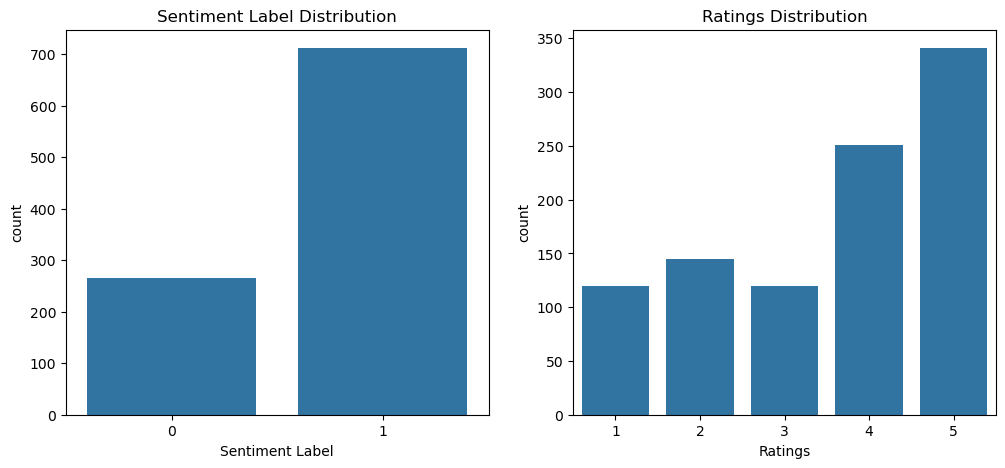

In [987]:
# CHECKS CLASS DISTRIBUTION IN Sentiment Label AND Ratings
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x="Sentiment Label", data=reviews)
plt.title("Sentiment Label Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Ratings", data=reviews)
plt.title("Ratings Distribution")

plt.show()

count    977.000000
mean      20.438076
std       10.421275
min        1.000000
25%       14.000000
50%       19.000000
75%       25.000000
max      149.000000
Name: review_length, dtype: float64


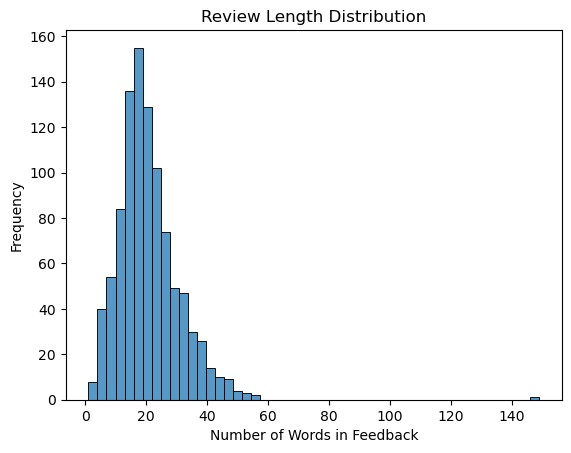

In [988]:
# ADDING A review length column BASED ON THE WORD COUNT
reviews["review_length"] = reviews["Feedback"].str.split().str.len()

# STATISTICS SUMMARY
print(reviews["review_length"].describe())

sns.histplot(reviews["review_length"], bins=50)
plt.title("Review Length Distribution")
plt.xlabel("Number of Words in Feedback")
plt.ylabel("Frequency")
plt.show()

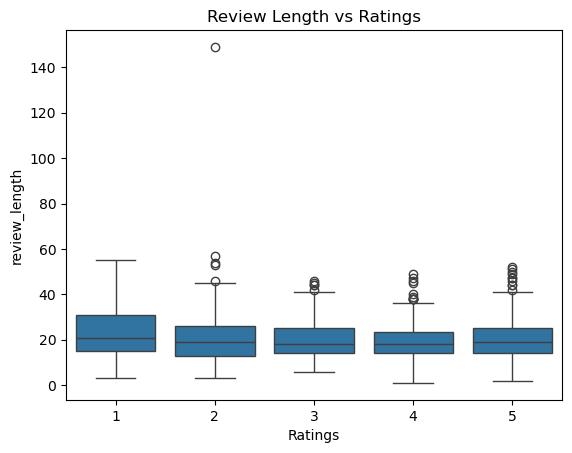

In [989]:
# LOOKING FOR OUTLIERS
sns.boxplot(data=reviews, x="Ratings", y="review_length")
plt.title("Review Length vs Ratings")
plt.show()



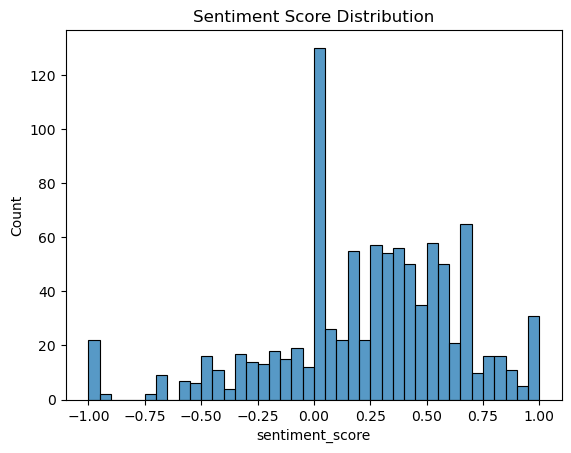

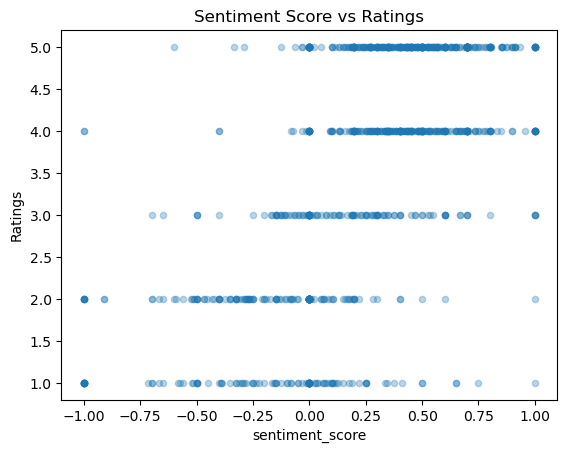

In [990]:
# GENERATES SENTIMENT SCORE 
reviews["sentiment_score"] = reviews["Feedback"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# HISTOGRAM OF sentiment scores
sns.histplot(reviews["sentiment_score"], bins=40)
plt.title("Sentiment Score Distribution")
plt.show()

# SCATTER PLOT IS : sentiment vs ratings
reviews.plot.scatter("sentiment_score", "Ratings", alpha=0.3)
plt.title("Sentiment Score vs Ratings")
plt.show()


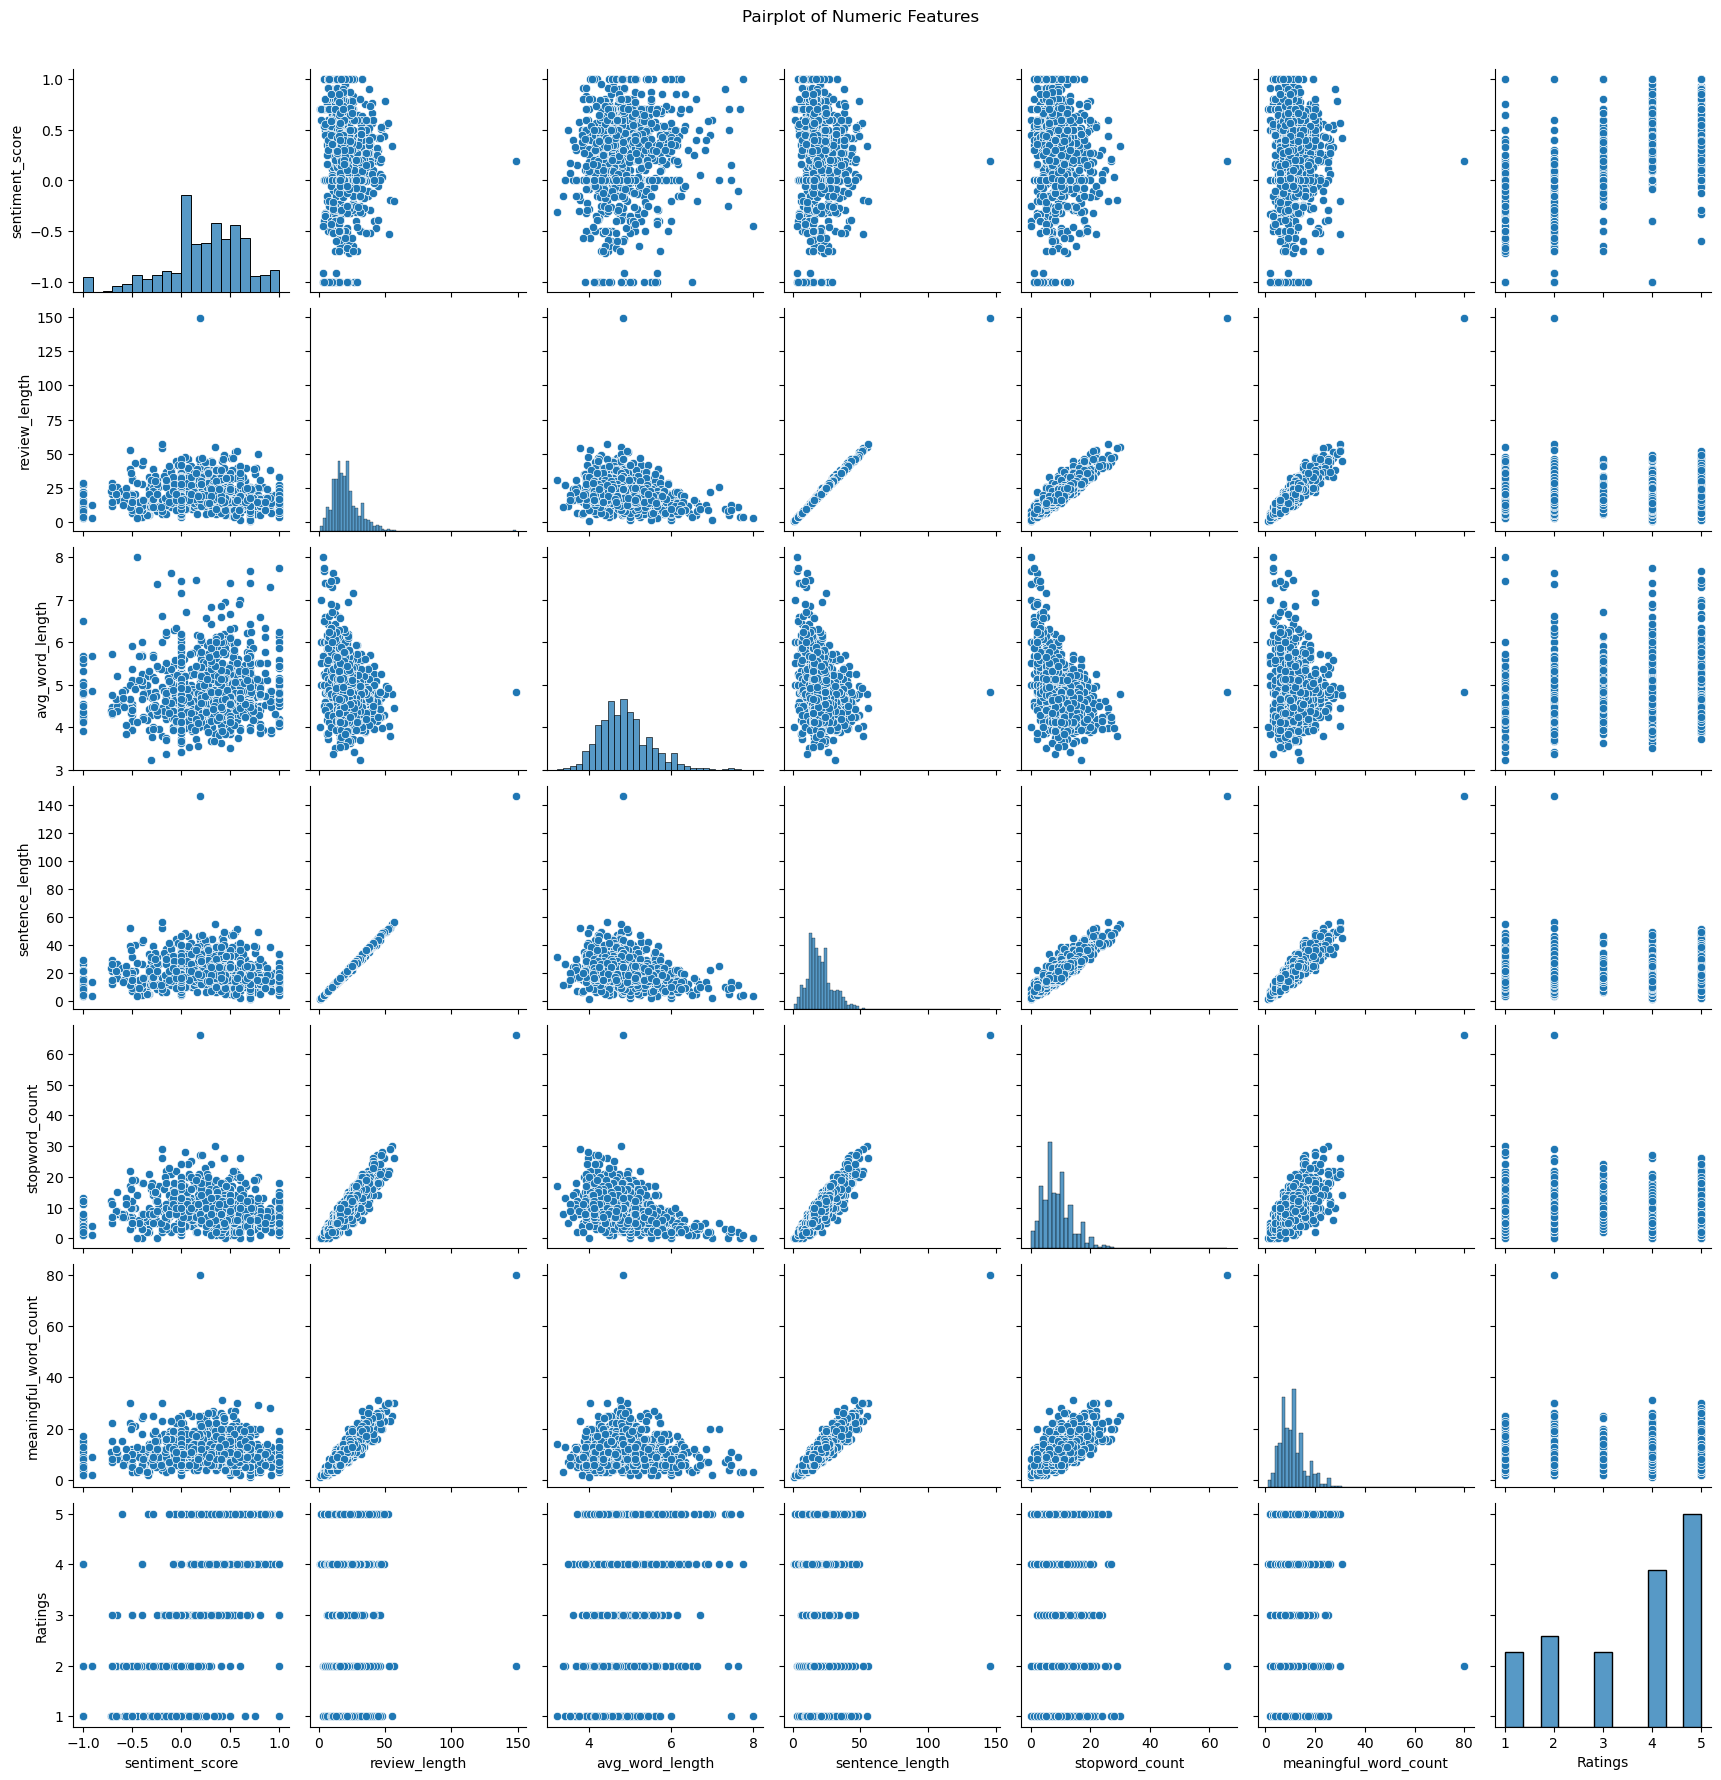

In [991]:
# PAIRPLOT USING THE NUMERIC FEATURES
sns.pairplot(reviews[["sentiment_score", "review_length", "avg_word_length", "sentence_length", "stopword_count", "meaningful_word_count", "Ratings"]])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

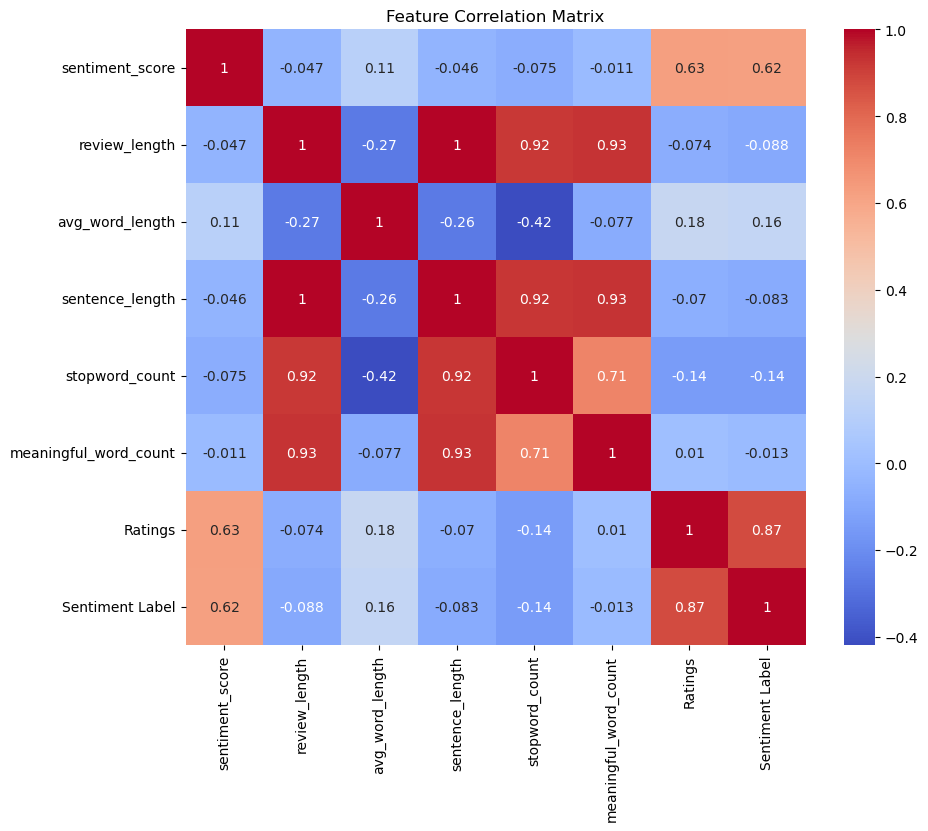

In [992]:
# CORRELATES FEATURES WITH Ratings AND Sentiment Label
corr_features = reviews[["sentiment_score", "review_length", "avg_word_length", "sentence_length", "stopword_count", "meaningful_word_count", "Ratings", "Sentiment Label"]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_features, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [993]:
# ENSURES THAT ONLY NUMERIC VALUES ARE SELECTED
features = ["sentiment_score", "review_length", "avg_word_length", "sentence_length",
            "stopword_count", "meaningful_word_count", "Ratings"]

# COMPUTES THE CORRELATION MATRIX 
corr_matrix = reviews[features].corr()

corr_pairs = (
    corr_matrix
    .unstack()
    .reset_index()
    .rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: "Correlation"})
)

# FILTERS OUT DUPLICATE PAIRS AND SELF CORRELATIONS
corr_pairs = corr_pairs[corr_pairs["Feature 1"] != corr_pairs["Feature 2"]]
corr_pairs["Pair"] = list(zip(corr_pairs["Feature 1"], corr_pairs["Feature 2"]))
corr_pairs = corr_pairs.drop_duplicates(subset="Pair").drop(columns="Pair")

# SORT ACCORDING TO CORRELATION
sorted_corr = corr_pairs.sort_values(by="Correlation", ascending=False)

# STRONGEST RELATIONSHIPS
print("\nStrongest Positive Correlations:")
print(sorted_corr.head(5))

print("\n Strongest Negative Correlations:")
print(sorted_corr.tail(5).sort_values(by="Correlation"))  



Strongest Positive Correlations:
                Feature 1              Feature 2  Correlation
22        sentence_length          review_length     0.998959
10          review_length        sentence_length     0.998959
36  meaningful_word_count          review_length     0.928636
12          review_length  meaningful_word_count     0.928636
26        sentence_length  meaningful_word_count     0.928559

 Strongest Negative Correlations:
          Feature 1        Feature 2  Correlation
30   stopword_count  avg_word_length    -0.419751
18  avg_word_length   stopword_count    -0.419751
15  avg_word_length    review_length    -0.265192
9     review_length  avg_word_length    -0.265192
23  sentence_length  avg_word_length    -0.264944


# FEATURE SELECTION

In [994]:
# DEFINING X AND Y OUR TARGET VARIABLE
X = reviews[[
    'Cleaned_Feedback',         
    'sentiment_score',          
    'review_length',
    'avg_word_length',
    'sentence_length',
    'stopword_count',
    'meaningful_word_count'
]]

y = reviews['Sentiment Label']  # BINARY LABEL 0 NEG AND 1 POS

In [995]:
# SPLIT THE DATA USING STRATIFICATION
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [996]:
# PREPROCESSING PIPELINE 
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Cleaned_Feedback'),
        ('num', StandardScaler(), [
            'sentiment_score', 'review_length', 'avg_word_length',
            'sentence_length', 'stopword_count', 'meaningful_word_count'
        ])
    ]
)

# Naive Bayes REQUIRES NON-NEGATIVE VALUES 
preprocessor_text_only = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'Cleaned_Feedback')
    ]
)


In [997]:
# LOGISTIC REGRESSION PIPELINE
pipeline_logreg = Pipeline([
    ('preprocess', preprocessor_scaled),
    ('clf', LogisticRegression(max_iter=1000))
])

# SUPPORT VECTOR MACHINE PIPELINE 
pipeline_svm = Pipeline([
    ('preprocess', preprocessor_scaled),
    ('clf', LinearSVC())
])

# NAIVE BAYES PIPELINE
pipeline_nb = Pipeline([
    ('preprocess', preprocessor_text_only), 
    ('clf', MultinomialNB())
])


In [998]:
# DEFINING HYPER PARAMETER GRIDS
param_grid_logreg = {
    'clf__C': [0.1, 1, 10],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs', 'liblinear']
}

param_grid_svm = {
    'clf__C': [0.1, 1, 10],
    'clf__loss': ['hinge', 'squared_hinge']
}

param_grid_nb = {
    'clf__alpha': [0.1, 1.0, 5.0]
}

# Wrap each in GridSearchCV
grid_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=5, scoring='f1', n_jobs=-1)
grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring='f1', n_jobs=-1)

# Update your model dictionary to use tuned models
models = {
    "Logistic Regression (Tuned)": grid_logreg,
    "Naive Bayes (Tuned)": grid_nb,
    "SVM (Tuned)": grid_svm
}

# TRAIN MODEL

In [999]:
#CREATE DICTIONARY FOR MODELS
models = {
    "Logistic Regression": pipeline_logreg,
    "Naive Bayes": pipeline_nb,
    "SVM": pipeline_svm
}

# TRAINING AND TEXT METRIC EVALUATION
for name, model in models.items():
    print(f"\n Training and Evaluating {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


 Training and Evaluating Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.60      0.67        53
           1       0.86      0.92      0.89       143

    accuracy                           0.84       196
   macro avg       0.80      0.76      0.78       196
weighted avg       0.83      0.84      0.83       196


 Training and Evaluating Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.15      0.26        53
           1       0.76      0.99      0.86       143

    accuracy                           0.77       196
   macro avg       0.82      0.57      0.56       196
weighted avg       0.79      0.77      0.70       196


 Training and Evaluating SVM
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        53
           1       0.89      0.91      0.90       143

    accuracy                           0.85       196
   macro avg  

c:\Users\nande\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# EVALUATE AND INTERPRET THE MODEL 


 Evaluating Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.60      0.67        53
           1       0.86      0.92      0.89       143

    accuracy                           0.84       196
   macro avg       0.80      0.76      0.78       196
weighted avg       0.83      0.84      0.83       196

Accuracy:  0.8367
Precision: 0.8627
Recall:    0.9231
F1 Score:  0.8919


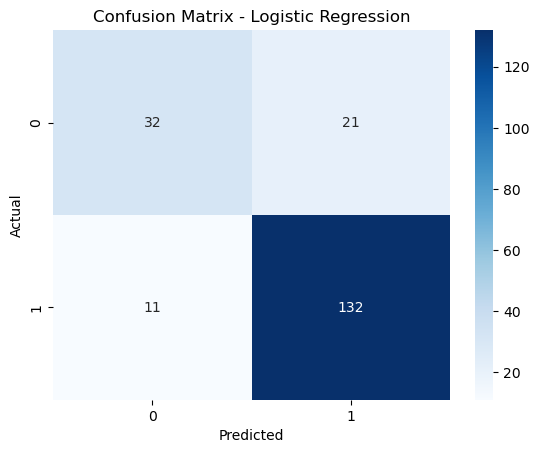


 Evaluating Naive Bayes
              precision    recall  f1-score   support

           0       0.89      0.15      0.26        53
           1       0.76      0.99      0.86       143

    accuracy                           0.77       196
   macro avg       0.82      0.57      0.56       196
weighted avg       0.79      0.77      0.70       196

Accuracy:  0.7653
Precision: 0.7594
Recall:    0.9930
F1 Score:  0.8606


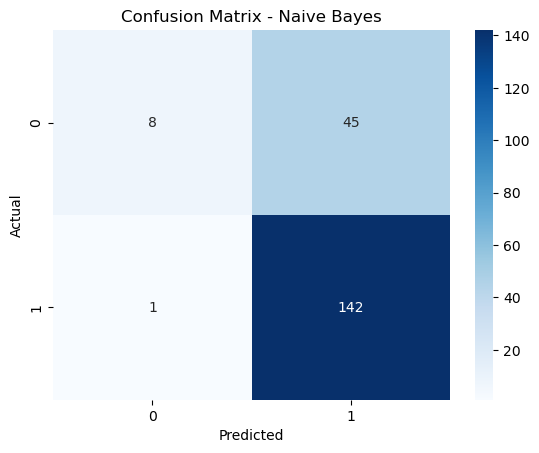


 Evaluating SVM
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        53
           1       0.89      0.91      0.90       143

    accuracy                           0.85       196
   macro avg       0.82      0.80      0.81       196
weighted avg       0.85      0.85      0.85       196

Accuracy:  0.8520
Precision: 0.8904
Recall:    0.9091
F1 Score:  0.8997


c:\Users\nande\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


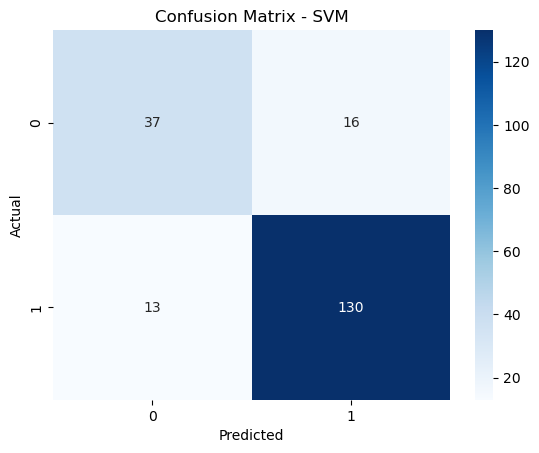

In [1000]:
for name, model in models.items():
    print(f"\n Evaluating {name}")
    
    # FIT AND PREDICT
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # PRINTING THE PERFORMANCE METRICS
    print(classification_report(y_test, y_pred))
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    
    # PLOTTING THE CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    